In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

,SL (m),Ts (C),Tdo (C),CO2 (ppmv),delta T (C),SeaLev_longPC1
2.000,-0.200,14.240,1.00,276.877778,-0.093242,5.960000
2.000,-0.200,14.240,1.06,276.855556,-0.093242,5.960000
2.000,-0.200,14.370,1.00,276.833333,-0.093242,5.960000
2.000,-0.200,14.370,1.06,276.811111,-0.093242,5.960000
2.000,0.900,14.240,1.00,276.788889,-0.093242,5.960000
...,...,...,...,...,...,...
797.700,-83.900,10.860,-0.69,189.266667,-6.437706,-92.596667
798.000,-83.825,10.865,-0.69,190.133333,-6.531787,-92.370000
798.512,-83.750,10.870,-0.69,191.000000,-6.678176,-92.370000
799.000,-83.675,10.875,-0.69,191.000000,-6.824564,-92.370000


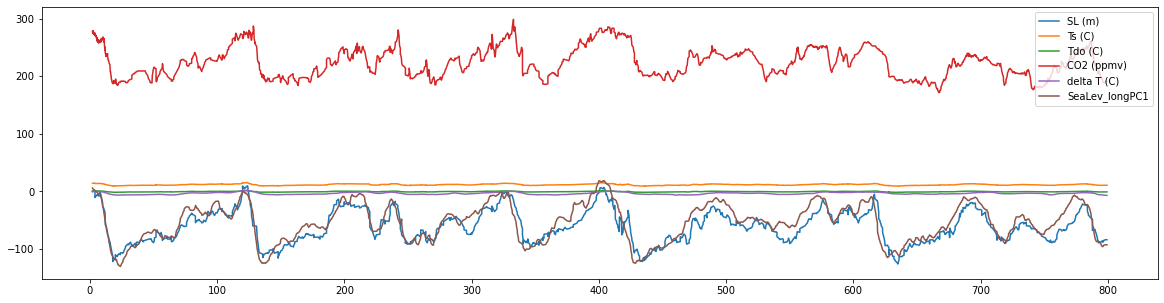

In [146]:
pretti = pd.read_csv("tolledaten.csv", index_col=0)
pretti.plot(figsize=(20,5))
pretti

In [17]:
lab = pretti["SeaLev_longPC1"]
lab2 = pretti["SL (m)"]
lab2 = lab2.interpolate(method='bfill')
data = pretti.iloc[:,1:5]
data = data.interpolate(method='bfill')

data.shape

(3494, 4)

In [23]:
xtrain = data.iloc[:int(len(data)*0.8)]
xtest = data.iloc[int(len(data)*0.8):]
ytrain = lab.iloc[:int(len(lab)*0.8)]
ytest = lab.iloc[int(len(lab)*0.8):]

In [20]:
alt_ytrain = lab2.iloc[0:int(len(lab2)*0.8)]
alt_ytest = lab2.iloc[int(len(lab)*0.8):len(lab)]

In [9]:
reg = RandomForestRegressor()
pred = reg.fit(xtrain, alt_ytrain)

In [25]:
xtest.shape

(2795, 4)

In [11]:
train_score = reg.score(xtrain, alt_ytrain)
test_score = reg.score(xtest, alt_ytest)

train_score
test_score
pred = reg.predict(xtest)

In [12]:
test_score

0.9858071929006703

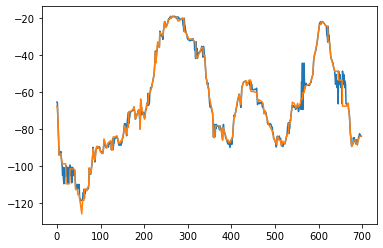

In [29]:
plt.plot(pred)
plt.plot(alt_ytest.values)


,nssCaflux,Fe flux,ssNaflux,nssSO4flux
"Age / kyr, EDC2",,,,
0,NaN,NaN,NaN,NaN
1,30.933803,9.843078,677.118302,2353.728090
2,25.548858,8.530608,629.004229,2354.787225
3,20.163913,7.218138,580.890156,2355.846360
4,21.584163,7.573746,541.009367,2308.740070
...,...,...,...,...
795,809.200231,205.554720,1198.904140,3389.818880
796,809.200231,205.554720,1198.904140,3389.818880
797,809.200231,205.554720,1198.904140,3389.818880


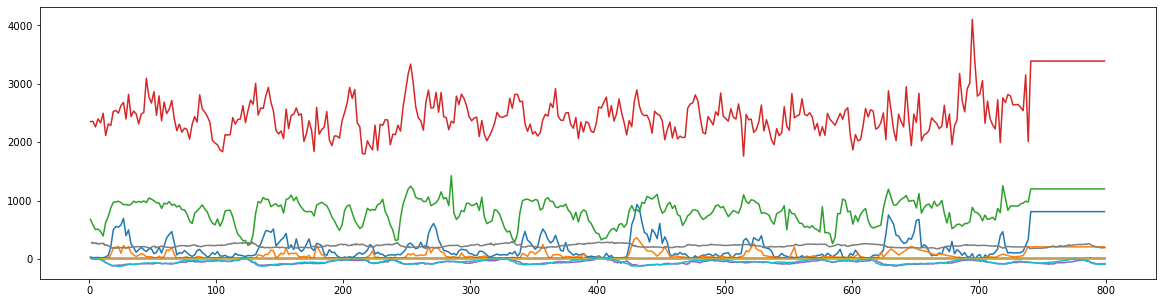

In [235]:
ironman_800 = (pd.read_excel('41586_2006_BFnature04614_MOESM3_ESM_new.xlsx', engine='openpyxl', index_col=0)).reindex(range(0,800))
ironman_800 = ironman_800.interpolate()

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(ironman_800)
ax.plot(pretti)

ironman_800

In [168]:
ironman_800.dropna().shape

(799, 4)

<AxesSubplot:>

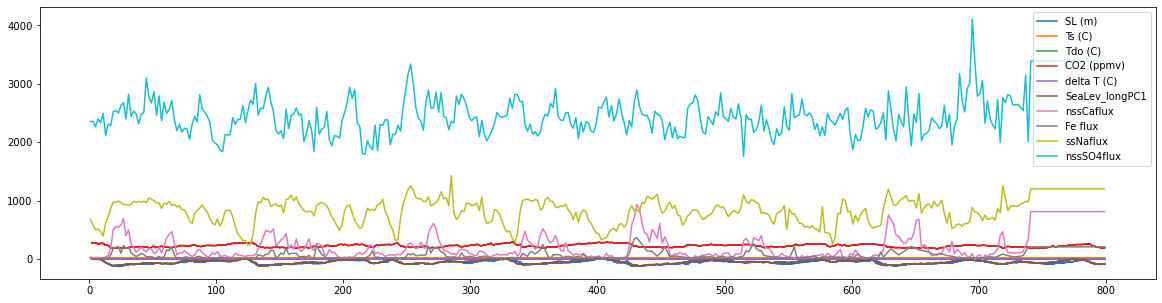

In [284]:
prettier = pretti.append(ironman_800).interpolate(method='nearest')
prettier.plot(figsize=(20,5))

<AxesSubplot:>

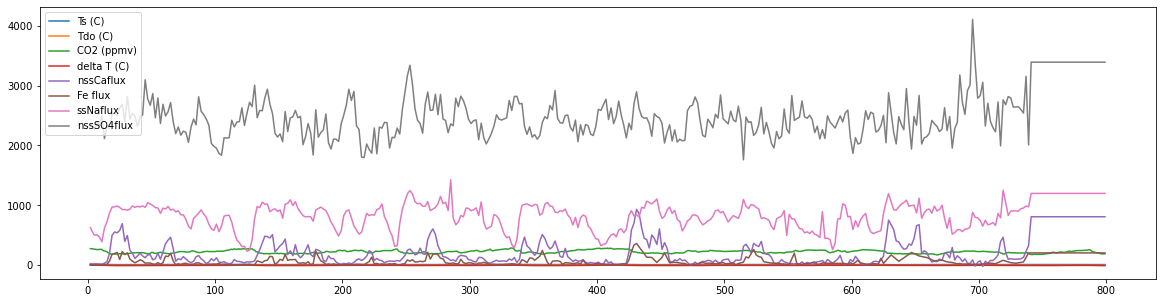

In [286]:
prettiest = prettier.interpolate(method='nearest').dropna()
label = prettiest['SeaLev_longPC1']
prettiest = prettiest.drop(['SL (m)', 'SeaLev_longPC1'], axis=1)


prettiest.plot(figsize=(20,5))

In [287]:
xtrain = prettiest.iloc[:int(len(prettiest)*0.8)]
xtest = prettiest.iloc[int(len(prettiest)*0.8):]
ytrain = label.iloc[:int(len(label)*0.8)]
ytest = label.iloc[int(len(label)*0.8):]

0.9855832099907277 0.5739427686325989


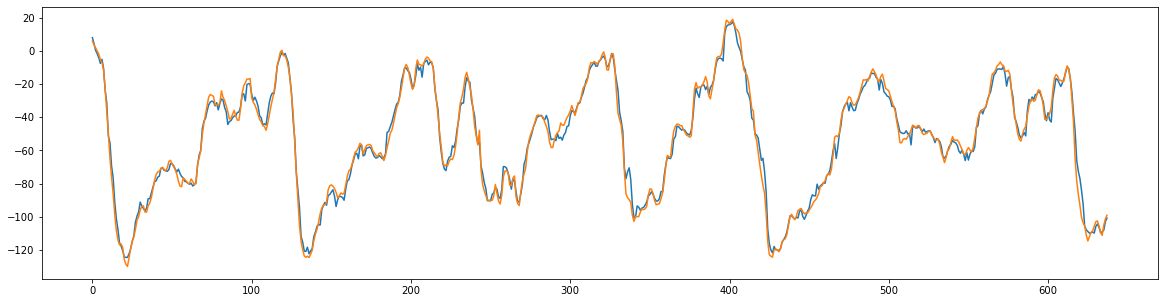

In [291]:
reg = RandomForestRegressor(n_estimators=100)
pred = reg.fit(xtrain, ytrain)

tr_score = reg.score(xtrain, ytrain)
te_score = reg.score(xtest, ytest)

tr_predict = reg.predict(xtrain)
te_predict = reg.predict(xtest)

print(tr_score, te_score)

plt.figure(figsize=(20,5))

plt.plot(tr_predict)
plt.plot(ytrain.values)


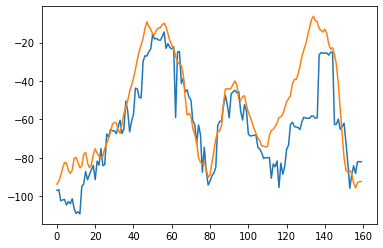

In [292]:
plt.plot(te_predict)
plt.plot(ytest.values)